创建数据集，将图像复制到训练、验证和测试的目录

In [3]:
import os, shutil

original_dataset_dir = '../data/dogs-vs-cats/train' #原始数据集解压目录
base_dir = '../data/cats_and_dogs_small'#保存较小数据集的目录

os.mkdir(base_dir)

#训练，验证，测试目录
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

#猫狗的训练目录
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

#猫狗的验证目录
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

#猫狗的测试目录
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

#将前1000张猫的图片复制到train_cats_dir
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

#将接下来的500张猫的图片复制到validation_cats_dir
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

#将接下来的500张猫的图片复制到test_cats_dir
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

    

#将前1000张狗的图片复制到train_dogs_dir
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

#将接下来的500张狗的图片复制到validation_dogs_dir
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

#将接下来的500张狗的图片复制到test_dogs_dir
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)


In [4]:
print('total train cat images:',len(os.listdir(train_cats_dir)))

total train cat images: 1000


In [5]:
print('total trian dog images:',len(os.listdir(train_dogs_dir)))

total trian dog images: 1000


In [6]:
print('total validation cat images:',len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [7]:
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:',len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total test dog images: 500


构建网络

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

配置模型用于训练

In [13]:
 from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

数据预处理

In [14]:
from keras.preprocessing.image import ImageDataGenerator

#将所有图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,#目标目录
                                                   target_size=(150,150),#将所有图像的大水调整为150X150
                                                    batch_size=20,
                                                   class_mode='binary'#因为使用了binary_crossentropy损失，所以需要用二进制标签
                                                   )
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 39s 385ms/step - loss: 0.6878 - acc: 0.5395 - val_loss: 0.6851 - val_acc: 0.5540
Epoch 2/30
100/100 [==============================] - 37s 371ms/step - loss: 0.6654 - acc: 0.5895 - val_loss: 0.6448 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 37s 365ms/step - loss: 0.6149 - acc: 0.6715 - val_loss: 0.6148 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 37s 365ms/step - loss: 0.5765 - acc: 0.6990 - val_loss: 0.5935 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 37s 370ms/step - loss: 0.5455 - acc: 0.7135 - val_loss: 0.5734 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 37s 375ms/step - loss: 0.5218 - acc: 0.7355 - val_loss: 0.5780 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 37s 369ms/step - loss: 0.4938 - acc: 0.7545 - val_loss: 0.6467 - val_acc: 0.6590
Epoch 8

保存模型

In [17]:
model.save('../model/cats_and_dogs_small_1.h5')

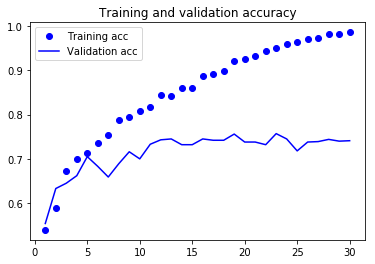

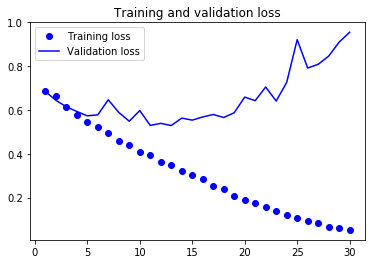

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 使用数据增强

In [21]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

显示几个随机增强后的训练图像

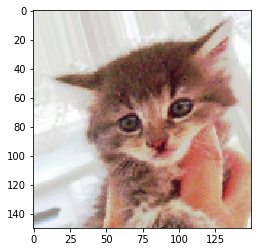

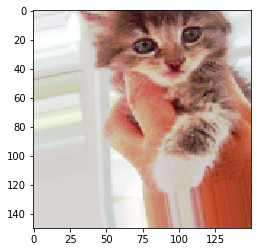

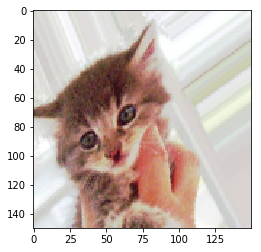

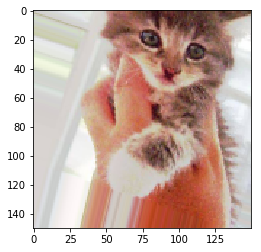

In [22]:
from keras.preprocessing import image  #图像预处理工具的模块

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] #选择一张图像进行增强
img = image.load_img(img_path,target_size=(150,150))#读取图像并调整大小
x = image.img_to_array(img) #将其转换为形状（150，150，3）的Numpy数组
x = x.reshape((1,)+x.shape) #将其形状改为（1，150，150，3）

#生成随机变换后的图像批量。循环是无限的，因此你需要在某个时刻终止循环
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break
        
plt.show()

In [27]:
x.shape

(1, 150, 150, 3)

如果你使用这种数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网
络看到的输入仍然是高度相关的，因为这些输入都来自于少量的原始图像。你无法生成新信息，
而只能混合现有信息。因此，这种方法可能不足以完全消除过拟合。为了进一步降低过拟合，
你还需要向模型中添加一个`Dropout` 层，添加到密集连接分类器之前。

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

我们来训练这个使用了数据增强和dropout 的网络。

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #注意，不能增强验证数据

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,#目标目录
                                                   target_size=(150,150),#将所有图像调整为大小150X150
                                                   batch_size=32,
                                                   class_mode='binary')#因为使用了binary_crossentropy损失，所以需要用二进制标签

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

history2 = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 58s 583ms/step - loss: 0.6915 - acc: 0.5294 - val_loss: 0.6761 - val_acc: 0.6091
Epoch 2/100
100/100 [==============================] - 56s 564ms/step - loss: 0.6786 - acc: 0.5703 - val_loss: 0.6569 - val_acc: 0.5954
Epoch 3/100
100/100 [==============================] - 57s 567ms/step - loss: 0.6598 - acc: 0.6059 - val_loss: 0.6373 - val_acc: 0.6136
Epoch 4/100
100/100 [==============================] - 57s 573ms/step - loss: 0.6448 - acc: 0.6203 - val_loss: 0.6348 - val_acc: 0.6237
Epoch 5/100
100/100 [==============================] - 54s 544ms/step - loss: 0.6243 - acc: 0.6503 - val_loss: 0.5851 - val_acc: 0.6916
Epoch 6/100
100/100 [==============================] - 54s 543ms/step - loss: 0.6141 - acc: 0.6584 - val_loss: 0.5760 - val_acc: 0.7030
Epoch 7/100
100/100 [==============================] - 54s 542ms/step - loss: 0.6067 - acc: 0.6741 -

100/100 [==============================] - 55s 546ms/step - loss: 0.4074 - acc: 0.8109 - val_loss: 0.4711 - val_acc: 0.7621
Epoch 61/100
100/100 [==============================] - 54s 545ms/step - loss: 0.4020 - acc: 0.8159 - val_loss: 0.4429 - val_acc: 0.8125
Epoch 62/100
100/100 [==============================] - 54s 543ms/step - loss: 0.3922 - acc: 0.8231 - val_loss: 0.4178 - val_acc: 0.8084
Epoch 63/100
100/100 [==============================] - 54s 541ms/step - loss: 0.4079 - acc: 0.8147 - val_loss: 0.6253 - val_acc: 0.7365
Epoch 64/100
100/100 [==============================] - 54s 543ms/step - loss: 0.4014 - acc: 0.8159 - val_loss: 0.5006 - val_acc: 0.7700
Epoch 65/100
100/100 [==============================] - 54s 543ms/step - loss: 0.3918 - acc: 0.8184 - val_loss: 0.6092 - val_acc: 0.7329
Epoch 66/100
100/100 [==============================] - 55s 545ms/step - loss: 0.3944 - acc: 0.8181 - val_loss: 0.5180 - val_acc: 0.7487
Epoch 67/100
100/100 [==============================] 

In [34]:
model.save('../model/cats_and_dogs_small_2.h5')